# Overlap of Quantum States

Inner products or even their absolute values are importants features of quantum states that provides information about the overlap of the two quantum states. They are used in many quantum algorithms. Even though quantum systems can mathematically described by Hilbert spaces, it is not trivial how one can measure the inner products, especially complex-valued inner products, for which there is no corresponding quantum observable. Quantum observables are associated with self-adjoint operators and their measurements will yield eigenvalues of these operators, which are always true. 

For this reason there is a family of quantum circuits that help with the calculations of inner products. There are three such protocols:

* Swap test 
* Hadamard test
* Inversion test

# Swap test

Let's assume a product state of two qubit registers $ \psi = \psi_a \otimes \psi_b $. The swap test calculates the absolute value of inner product between the two states that compose the product state. 

The initial state of the system is: $ \psi_1 = \psi_a \otimes \psi_b \otimes \psi_{anc} $

Swap test is performed by the following steps:

* Use an ancilla qubit and put it in an equal superposition

$\psi_2 = \frac{1}{\sqrt 2} [\psi_a \otimes \psi_b \otimes \psi_{0} + \psi_a \otimes \psi_b \otimes \psi_{1}] $

* Swap the two composite quantum states in the one branch of the superposition, with the help of a controlled unitary gate controlled by the ancilla qubit

$\psi_3 = \frac{1}{\sqrt 2} [\psi_a \otimes \psi_b \otimes \psi_{0} + \psi_b \otimes \psi_a \otimes \psi_{1}] $

* Apply hadamard again to ancilla qubit, the ancilla qubit then is interfered and represents the sum and the difference of the swapped states in each branch

$\psi_{final} = \frac{1}{\sqrt 2} [(\psi_a \otimes \psi_b + \psi_b \otimes \psi_a) \otimes \psi_{0} + (\psi_a \otimes \psi_b - \psi_b \otimes \psi_a) \otimes \psi_{1}] $

* From measurement statistics and accepting only measurement outcomes for the ancilla qubit the eigenvalues of the $\ket{0}$ one gets the probability to measure ancilla to state 0

$ P_{anc=0} = \frac{1}{2} + \frac{1}{2} |\langle \psi_a,\psi_b \rangle|^2 $ and the absolute value of the inner product is: $ |\langle \psi_a,\psi_b \rangle|^2 = 1 - 2 P_{anc=0} $

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.visualization import plot_histogram, plot_state_city
import numpy as np

# create the 1st composite register
quantum_state_a = QuantumRegister(1, 'qs_a')

# create the 2st composite register
quantum_state_b = QuantumRegister(1, 'qs_b')

# create the ancilla qubit required for the swap test
ancilla = QuantumRegister(1, 'ancilla')

# and a classical register to store the measurement of the ancilla qubit
classical_register = ClassicalRegister(1, 'c')

# compose the quantum registers and the classical register into a full quantum circuit
circuit = QuantumCircuit(quantum_state_a, quantum_state_b, ancilla, classical_register)

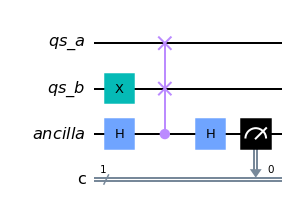

In [3]:
# function to perform the swap test
def swap_test(circuit, register1, register2, ancilla_register, classical_register):
    circuit.h(ancilla_register)

    circuit.cswap(ancilla_register, register1, register2)

    circuit.h(ancilla_register)

    circuit.measure(ancilla, classical_register)

# put state b as state 1
circuit.x(quantum_state_b)

# perform the swap test
swap_test(circuit, quantum_state_a, quantum_state_b, ancilla, classical_register)

#draw circuit
circuit.draw(output = 'mpl')

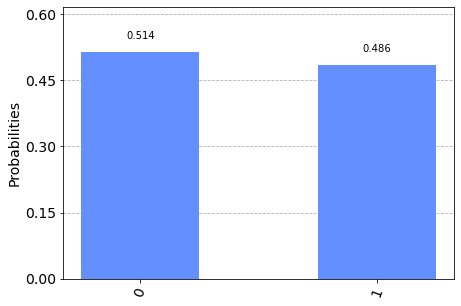

In [4]:
# finally simulate the circuit and get the phase from the measurements
from qiskit import Aer

simulator = simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend = simulator, shots = 1000).result()

counts = result.get_counts()

plot_histogram(counts)

# Result analysis
From the statistics we have the the prob of the 0 measurement of the ancilla is about 1/2, so this result means that the the absolute value of the inner product of thw two states are:

$ |<\psi_a,\psi_b>|^2 = 1 - 2 P_{anc=0} = 1 - 2 \frac{1}{2} = 0 $

which means that the two vectors are orthohonal, which is what we expected since the two vector set the start a and b are 0 and 1 which are the computational orthonormal basis vectors

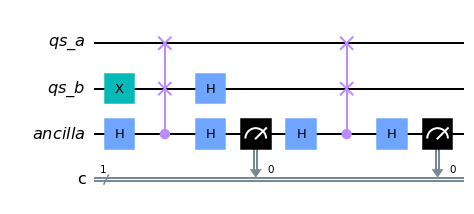

In [5]:
# put state b as a superpostion state, for example +, to see what is the correlation with the 0 vector
circuit.h(quantum_state_b)

# perform the swap test
swap_test(circuit, quantum_state_a, quantum_state_b, ancilla, classical_register)

#draw circuit
circuit.draw(output = 'mpl')

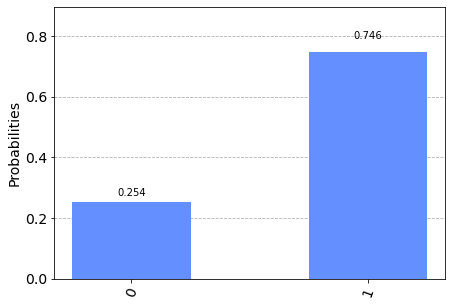

In [6]:
# finally simulate the circuit and get the phase from the measurements
from qiskit import Aer

simulator = simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend = simulator, shots = 1000).result()

counts = result.get_counts()

plot_histogram(counts)

# Hadamard Test
Another heuristic that gives the inner product of two quantum states is the Hadamard test. It is a bit more complex than swap test, becuase it requires state preparation or maybe data encoding. 
Given two unit vectors (which is the case in quantum computing), there is a connection between their sum and their inner product. More precisely:

Let a, b be two real-valued unit vectors: 

$$ (a+b)^T(a+b) = \sum_i (a_i+b_i)^2 = \sum_i a_i^2 + \sum_i b_i^2 + 2 \sum_i a_ib_i = 2 + 2 \langle a,b \rangle $$

Hadamard is performed in two phases:

### 1st PHASE: Compute the real part of the inner product:

* Use an ancilla qubit and put it in state 

$\ket{+} = \frac{1}{\sqrt(2)} (\psi_0 + \psi_1)$

* Prepare the two states \(\psi_a\) and \(\psi_b\) each in each branch of the superposition of the ancilla qubit

$\psi = \frac{1}{2} (\psi_0 \otimes \psi_a + \psi_1 \otimes \psi_b ) $

* Apply Hadamard gate to the ancilla qubit

$\psi_2 = \frac{1}{2} (\psi_0 \otimes (\psi_a + \psi_b) + \psi_1 \otimes (\psi_a - \psi_b)) $

* From measurement statistics and accepting only measurement outcomes for the ancilla qubit the eigenvalues of the $\ket{0}$ one gets the probability to measure ancilla to state 0

$ P_{anc=0} = \lVert (P(\psi_0) \otimes I) \psi_2 \rVert^2 = \frac{1}{4} \langle \psi_0 \otimes (\psi_a + \psi_b),\psi_0 \otimes (\psi_a + \psi_b) \rangle
    = \frac{1}{4} \langle \psi_a + \psi_b,\psi_a + \psi_b \rangle = \frac{1}{2} (1 + Re(\langle \psi_a,\psi_b \rangle))$

So the real part of the inner product is : $ Re(\langle \psi_a,\psi_b \rangle) = 2P_{anc=0} - 1 $

### 2st PHASE: Compute the imaginary part of the inner product:

* Use an ancilla qubit and put it in state 

$\psi_{anc} = \frac{1}{\sqrt(2)} (\psi_0 - i\psi_1)$

* Prepare the two states \(\psi_a\) and \(\psi_b\) each in each branch of the superposition of the ancilla qubit

$\psi = \frac{1}{2} (\psi_0 \otimes \psi_a - i \psi_1 \otimes \psi_b ) $

* Apply Hadamard gate to the ancilla qubit

$\psi_2 = \frac{1}{2} (\psi_0 \otimes (\psi_a - i \psi_b) + \psi_1 \otimes (\psi_a + i \psi_b)) $

* From measurement statistics and accepting only measurement outcomes for the ancilla qubit the eigenvalues of the $\ket{0}$ one gets the probability to measure ancilla to state 0

$ P_{anc=0} = \lVert (P(\psi_0) \otimes I) \psi_2 \rVert^2 \\
\;\;\;\;\;\;\;\;\;\;\;= \frac{1}{4} \langle \psi_0 \otimes (\psi_a - i \psi_b),\psi_0 \otimes (\psi_a - i \psi_b) \rangle \\
\;\;\;\;\;\;\;\;\;\;\;= \frac{1}{4} \langle \psi_a - i \psi_b,\psi_a - i \psi_b \rangle \\
\;\;\;\;\;\;\;\;\;\;\;=  \frac{1}{4} (\langle \psi_a,\psi_a\rangle + \langle \psi_a,-i \psi_b\rangle + \langle -i \psi_b,\psi_a\rangle + \langle -i \psi_b,-i \psi_b\rangle) \\
\;\;\;\;\;\;\;\;\;\;\;= \frac{1}{4} (2 - i (\langle \psi_a,\psi_b \rangle - \overline{\langle \psi_a,\psi_b \rangle})) \implies \\
P_{anc=0} = \frac{1}{2} (1 - Im(\langle \psi_a,\psi_b \rangle)) $

So the real part of the inner product is : $ Im(\langle \psi_a,\psi_b \rangle) = 1 - 2P_{anc=0} $

In [7]:
# create the circuit to perform the hadamard test

# create ancilla qubit register
ancilla_qubit = QuantumRegister(1, 'ancilla')

# create the qubit in which the states a and b will be set, but in a different branch controlled by ancilla qubit
state_qubit = QuantumRegister(1, 'quantum_state')

# and a classical register to store the measurement of the ancilla qubit
classical_register = ClassicalRegister(1, 'c')

### Compute the real part of the inner product

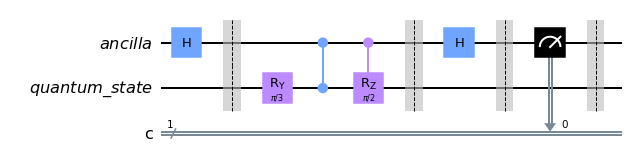

In [8]:
# create a circuit 
real_part_circuit = QuantumCircuit(ancilla_qubit, state_qubit, classical_register)

# put the ancilla qubit in + state
real_part_circuit.h(0)

real_part_circuit.barrier()

# rotate state qubit in the y axis per pi / 3 angle
real_part_circuit.ry(np.pi / 3, 1)

# rotate state qubit cotrolled by the 1st qubit
real_part_circuit.cz(0, 1)
real_part_circuit.crz(np.pi / 2, 0, 1)

real_part_circuit.barrier()

# apply hadamard trick to the ancilla, then the measurement probability of ancilla qubit 
# in state 0 will reaveal the real part of the inner product between states a and b
real_part_circuit.h(0)

real_part_circuit.barrier()

# finally measure the ancilla qubit
real_part_circuit.measure(0, 0)

real_part_circuit.save_statevector()

# draw the circtuin
%matplotlib inline
real_part_circuit.draw()

In [9]:
# finally simulate the circuit and get the phase from the measurements
from qiskit import Aer, transpile

simulator = simulator = Aer.get_backend('aer_simulator')
real_part_circuit = transpile(real_part_circuit, simulator)

# run and get the state vector
result = simulator.run(real_part_circuit).result()
statevector = result.get_statevector(real_part_circuit)
plot_state_city(statevector, title='state')
statevector.draw(output='latex')

<IPython.core.display.Latex object>

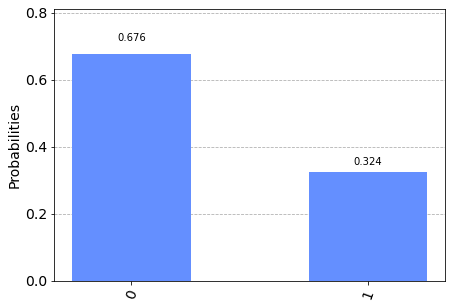

In [10]:
simulator = simulator = Aer.get_backend('qasm_simulator')

result = execute(real_part_circuit, backend = simulator, shots = 1000).result()

counts = result.get_counts()

plot_histogram(counts)

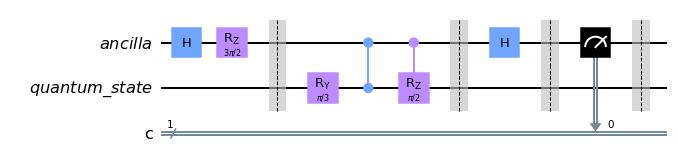

In [11]:
# create a circuit 
imag_part_circuit = QuantumCircuit(ancilla_qubit, state_qubit, classical_register)

# put the ancilla qubit in + state
imag_part_circuit.h(0)
imag_part_circuit.rz(3 * np.pi / 2, 0)

imag_part_circuit.barrier()

# rotate state qubit in the y axis per pi / 3 angle
imag_part_circuit.ry(np.pi / 3, 1)

# rotate state qubit cotrolled by the 1st qubit
imag_part_circuit.cz(0, 1)
imag_part_circuit.crz(np.pi / 2, 0, 1)

imag_part_circuit.barrier()

# apply hadamard trick to the ancilla, then the measurement probability of ancilla qubit 
# in state 0 will reaveal the real part of the inner product between states a and b
imag_part_circuit.h(0)

imag_part_circuit.barrier()

# finally measure the ancilla qubit
imag_part_circuit.measure(0, 0)

imag_part_circuit.save_statevector()

# draw the circtuin
%matplotlib inline
imag_part_circuit.draw()

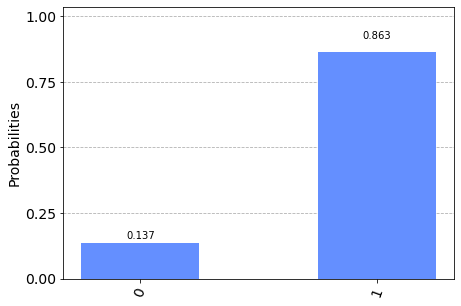

In [12]:
simulator = simulator = Aer.get_backend('qasm_simulator')

result = execute(imag_part_circuit, backend = simulator, shots = 1000).result()
simulator = simulator = Aer.get_backend('qasm_simulator')

result = execute(imag_part_circuit, backend = simulator, shots = 1000).result()

counts = result.get_counts()

plot_histogram(counts)

### Analysis and calculation of total inner product

After the first circuit execution, from the previous analysis we can find the real part of the inner product of the two states:

$ Re(\langle \psi_a, \psi_b \rangle) = 2P_{anc=0} - 1 = 2 * 0.7 - 1 = 0.4 $

After the second circuit execution, from the analysis we can find the imaginary part of the inner product of the two states:

$ Im(\langle \psi_a, \psi_b \rangle) = 1 - 2P_{anc=0} = 1 - 2 * 0.14 = 0.7 $

So finally, putting them all together we find the inner product, which is an imaginary number:

$ \langle \psi_a, \psi_b \rangle = 0.4 + 0.7 i $

# Inversion test

This methods can be used to reduce to the minimum number of qubits required to compute the overlap of some states. Although this method requires one of the two preparation transformations circuits to be invertable.

Let A and B be the transformations to prepare the state $\psi_a = A \psi_0$ and $\psi_b = B \psi_0$. This method works as follows:

By assumption, one of the two maps, let it be the B, has to be invertable. So, that one can create the circuit $B^*A \psi_0$

More precicely the steps of the method are:

* Create the circuit $B^*A \psi_0$

$ \phi = B^*A\psi $

* Measure the state and get the probability the output is associated with the state $\psi_0$

$ P_{\psi_0} = \lVert P_0 \phi \rVert^2 = \lVert \langle \psi_0,B^*A\psi_0 \rangle \psi_0 \rVert^2 = |\langle \psi_0,B^*A\psi_0 \rangle|^2 = |\langle B\psi_0,A\psi_0 \rangle|^2$
$ P_{\psi_0} = |\langle \psi_b,\psi_a \rangle|^2 $

* So finally we get the absolute value of the inner product be the possibility to measure the quantum register in state $\psi_0$

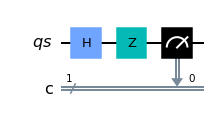

In [23]:
# create the state register
quantum_state = QuantumRegister(1, 'qs')

# and a classical register to store the measurement of the ancilla qubit
classical_register = ClassicalRegister(1, 'c')

# compose the quantum registers and the classical register into a full quantum circuit
circuit = QuantumCircuit(quantum_state, classical_register)

# let the A transformation be the quantum gate X
circuit.h(0)

# let the B transformation be the Z gate, so the Z* is the same (Z* = Z)
circuit.z(0)

# finally measure the state
circuit.measure(0, 0)

%matplotlib inline
circuit.draw('mpl')

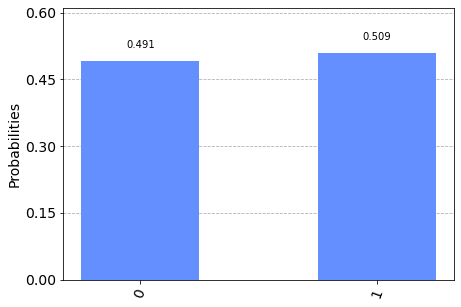

In [24]:
simulator = simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend = simulator, shots = 1000).result()

counts = result.get_counts()

plot_histogram(counts)

* So finally, the overlap of the two states are equal to the probability to measure $\psi_0$

$ |\langle B\psi_0,A\psi_0 \rangle| = \sqrt{0.5} $

which is what we expected to be since the two states \psi_a and \psi_b have inner product ($ 1 / \sqrt{2}$)